# Crop Prediction 

The system will select the best crop for cultivation based on predicted rainfall, soil content, and weather parameters. 

This system also shows the required seed for cultivation in Kg per acre for the recommended crop, as well as details about required fertilizer such as nitrogen (N), phosphorus (P), and potassium (K) in Kg per hectare. 

Other features of this method include displaying the current market price and the projected yield in quintals per acre for the chosen crop. All of these facts will aid farmers in selecting the most profitable crop.




Crop prediction is a critical responsibility for decision-makers at the national and regional levels in order to make quick decisions.

Farmers can use an accurate crop production prediction model to assist them determine what to grow and when to grow it. The 

following 21 crops are included in the dataset:
 ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [2]:
import pandas as pd 

#matplotlib
import matplotlib.pyplot as plt 

#seaborn
import seaborn as sns

#numpy
import numpy as np,os

#sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
os.chdir('C:\Machine Learning\Raw Data')

In [5]:
os.listdir()

['Bigmart_sale_test.csv',
 'Bigmart_sale_train.csv',
 'Crop_recommendation.csv',
 'random_forest_regression_model.pkl']

In [6]:
crop_data=pd.read_csv('Crop_recommendation.csv')

In [7]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
crop_data.shape

(2200, 8)

data set conatins 2200 records and 8 columns

#### Dtypes in Data set

In [10]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### checking null values 

In [11]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no null values present in our dataset.

In [85]:
crop_data['no_label'] = pd.Categorical(crop_data.label).codes

In [18]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,no_label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,5


## Exploratory Data Analysis (EDA) 

#### 1]  Nitrogen

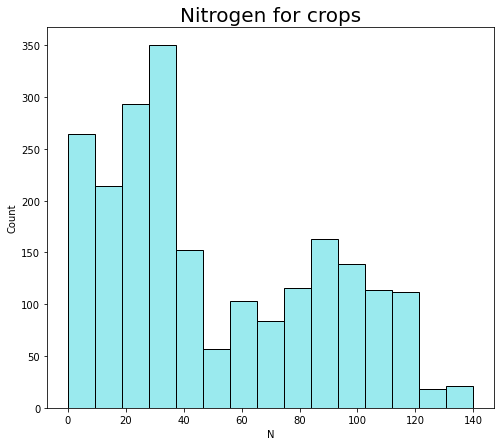

In [22]:
plt.figure(figsize=(8,7))
sns.histplot(x='N',data=crop_data,color='#79E4E9');
plt.title("Nitrogen for crops",{'fontsize':20});

Nitrogen is an essential nutrient for plant growth, development and reproduction.Soil nitrogen exists in three general forms: organic nitrogen compounds, ammonium (NH₄⁺) ions and nitrate (NO₃⁻) ions.

### 2] Potassium

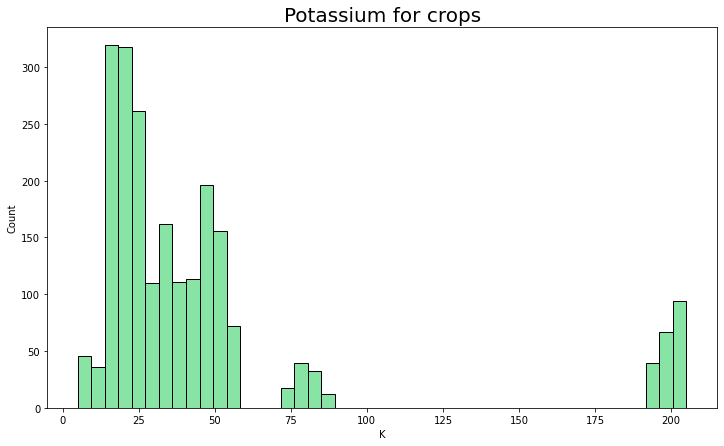

In [25]:
plt.figure(figsize=(12,7))
sns.histplot(x='K',data=crop_data,color='#5FDB86');
plt.title("Potassium for crops",{'fontsize':20});

Importance of Potassium in Platns:
    
The rate of respiration by plants is largely the determining factor for proper uptake and transport of potassium by plants.

Potassium also facilitates protein and starch synthesis in plants.

It activates enzymes responsible for specific functions.

### 3] Phosphorus

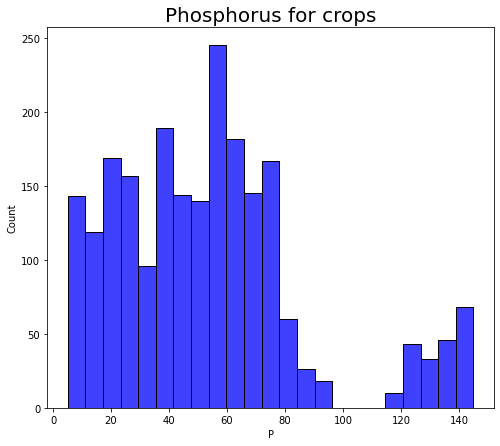

In [32]:
sns.histplot()

Text(0.5, 1.0, 'Phosphorus for crops')

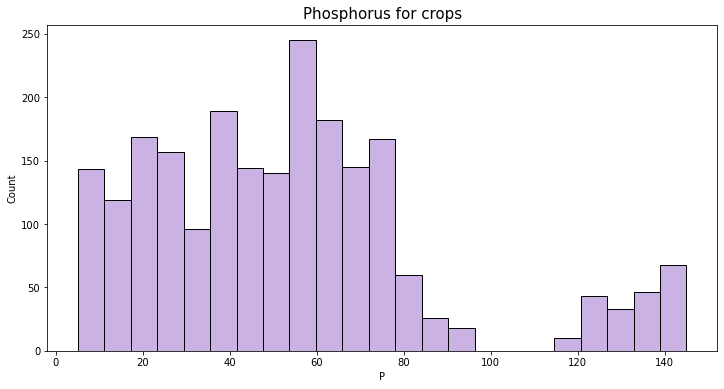

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(x='P',data=crop_data,color='#BA99DC')
plt.title("Phosphorus for crops",{'fontsize':15})

## Importance of Phosphorus to Plants :
    
Phosphorus is important for cell division and development of new tissues.

Adding phosphrous to plats helps for root growth.

It also recomend for early growth of plants.

In [39]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'no_label'],
      dtype='object')

### 4] Temperature

<AxesSubplot:xlabel='temperature', ylabel='Count'>

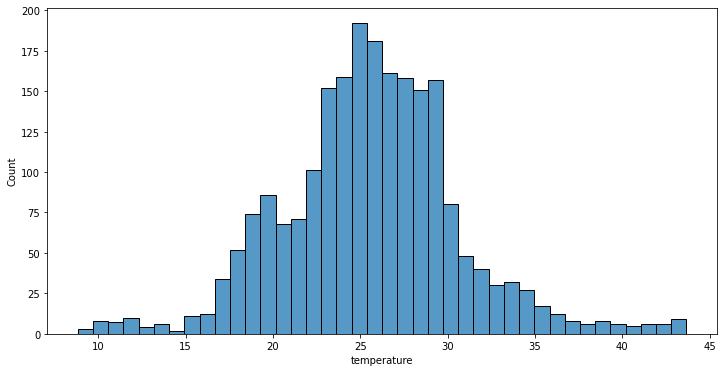

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(x='temperature',data=crop_data)

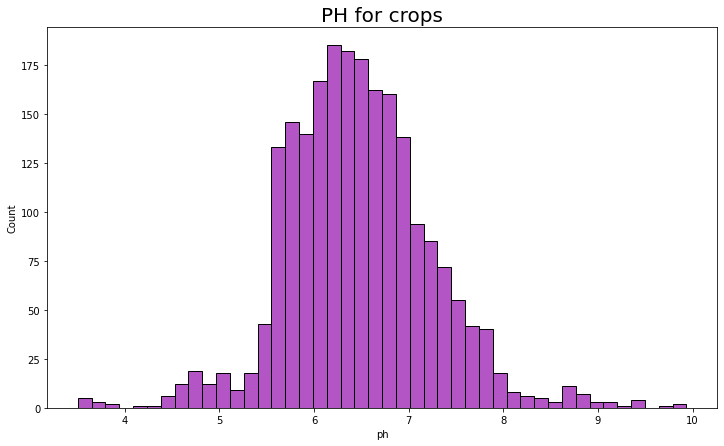

In [54]:
plt.figure(figsize=(12,7))
sns.histplot(x='ph',data=crop_data,color='#9A1CB0');
plt.title("PH for crops",{'fontsize':20});

pH stands for ‘potential of hydrogen’ and refers to the amount of hydrogen found in the soil.

Importance of PH to plamts :
pH can affect a plant’s ability to absorb vital nutrients from the soil. If pH is too acidic or alkaline, this can stunt or retard root growth and consequently, restrict water and nutrient uptake.



### 7] Rainfall

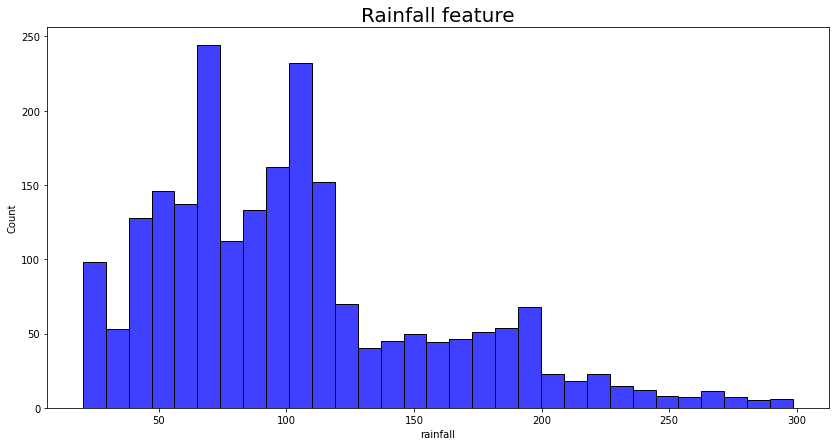

In [57]:
plt.figure(figsize=(14,7))
sns.histplot(x='rainfall',data=crop_data,color='b');
plt.title("Rainfall feature",{'fontsize':20});

In [86]:
X = crop_data.drop(['label','no_label'],axis=1)
y = crop_data.no_label

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


## Feature Scaling¶


In [88]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1267,40,132,202,24.575584,80.706958,5.971813,69.706113
971,32,14,37,22.730313,88.485679,6.825256,104.684324
1872,27,30,31,28.985453,90.739668,5.718120,148.839837
1773,56,50,52,33.087061,92.251975,6.770385,88.130077
353,3,77,25,24.849062,22.894646,5.608165,62.212922


In [89]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [90]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  97.04545454545455 %
Accuracy Score for Random Forest is :  99.31818181818181 %
Accuracy Score for Support Vector Machine is :  97.72727272727273 %


In [91]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_pred = rf.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        21
           8       0.94      0.94      0.94        18
           9       1.00      1.00      1.00        21
          10       1.00      0.95      0.97        19
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        15
          13       0.95      1.00      0.97        18
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        18
          17       1.00    

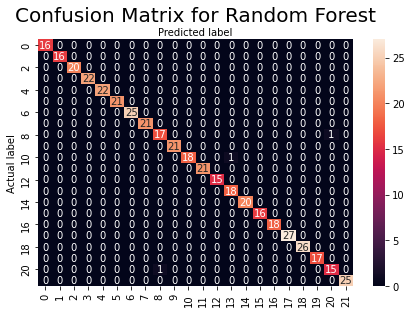

In [94]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()